In [148]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [149]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [150]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [151]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [152]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [153]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [154]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [155]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [156]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

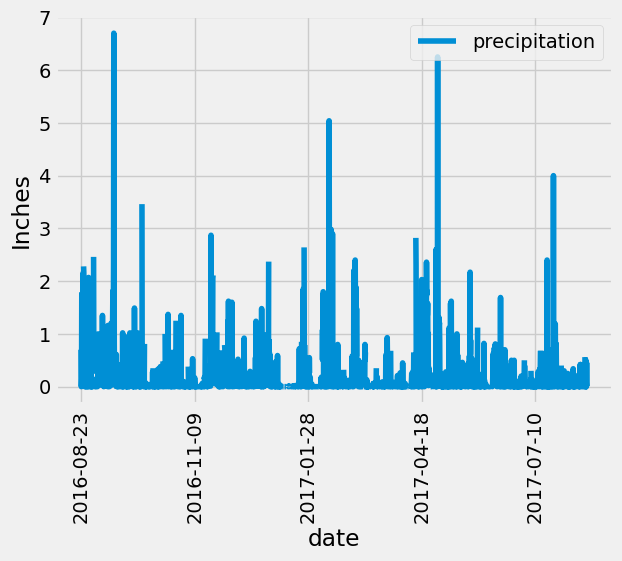

In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
current_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
previous_year = dt.datetime.strftime(dt.datetime.strptime(current_date,'%Y-%m-%d') - dt.timedelta(days = 365), '%Y-%m-%d')


# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year).\
        order_by(Measurement.date.desc()).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date_precipitation, columns = ["date", "precipitation"])


# Sort the dataframe by date
df.sort_values("date", inplace= True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'precipitation', rot = 90)
plt.legend(loc='upper right')
plt.ylabel('Inches')
plt.show()


In [158]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [159]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [160]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =  session.query(Measurement.station,func.count(Measurement.station)).\
                                 group_by(Measurement.station).\
                                 order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
#setting station name using the above results
station_name = active_stations[0][0]

In [162]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
    func.avg(Measurement.tobs)).filter(Measurement.station == station_name).all()
temp


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

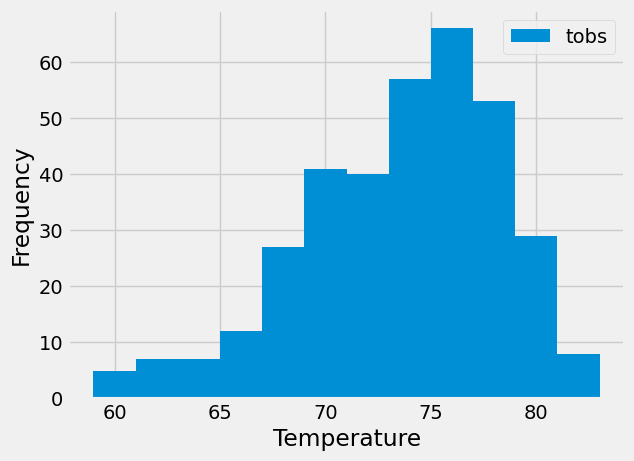

In [163]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.tobs).filter(Measurement.station == station_name).\
    filter(Measurement.date>= previous_year).all()
    
#change the query result as pandas DataFrame and Plot
pd.DataFrame(temp_observation).plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')


# Close Session

In [164]:
# Close Session
session.close()